# <center>**Customer Churn Detection Project**<center/>

## ***1. Importing needed Libraries and Data Reading:***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, roc_curve, auc

In [5]:
# Reading the Data
file_path = 'Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Displaying Samples from the Data
print("The first 5 rows in data:")
df.head()

The first 5 rows in data:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## ***2. Data Preprocessing and Visualization:***

In [7]:
# Seeing info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Dropping irrelevant columns "unuseful for prediction"
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
# Seeing dataset statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Checking for duplicates
df.duplicated().sum()

0

In [11]:
# Checking for null values
null_values = df.isnull().sum()
print(null_values)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
# Comment: No duplicates were found, and there are no null values.

#### *Visualizing Age :*

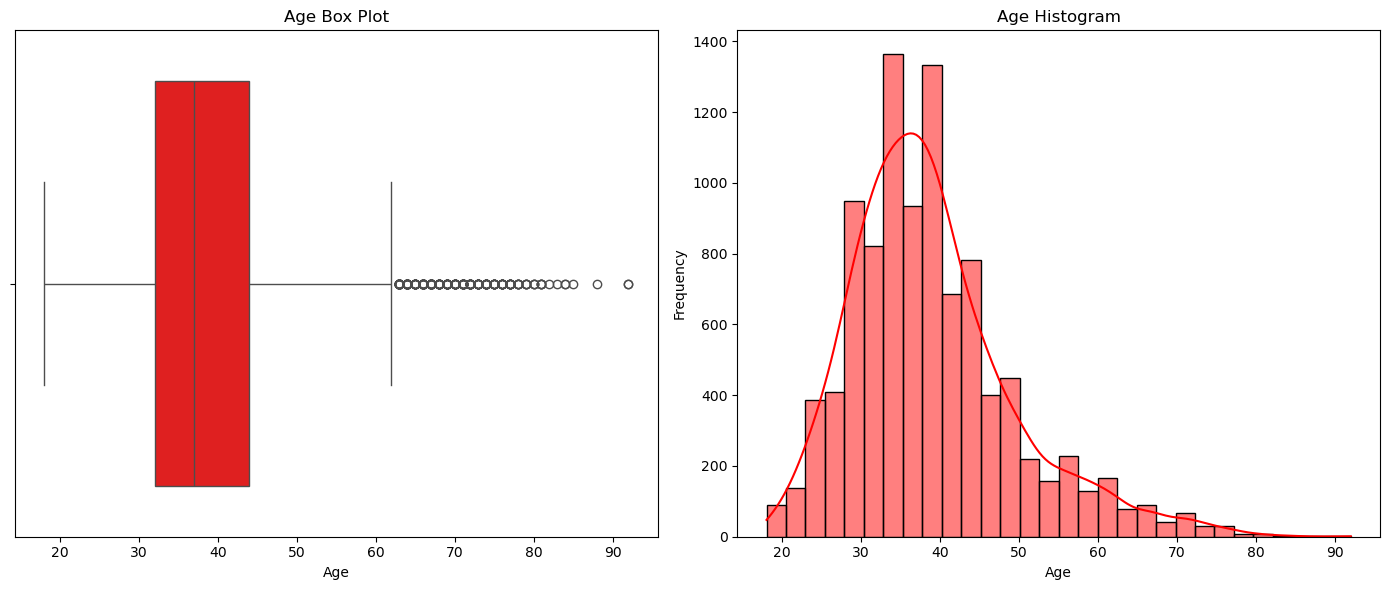

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axs[0], x=df['Age'], color='red')
axs[0].set_title('Age Box Plot')
axs[0].set_xlabel('Age')

sns.histplot(ax=axs[1], data=df, x='Age', bins=30, kde=True, color='red')
axs[1].set_title('Age Histogram')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### *Visualizing Tenure :*

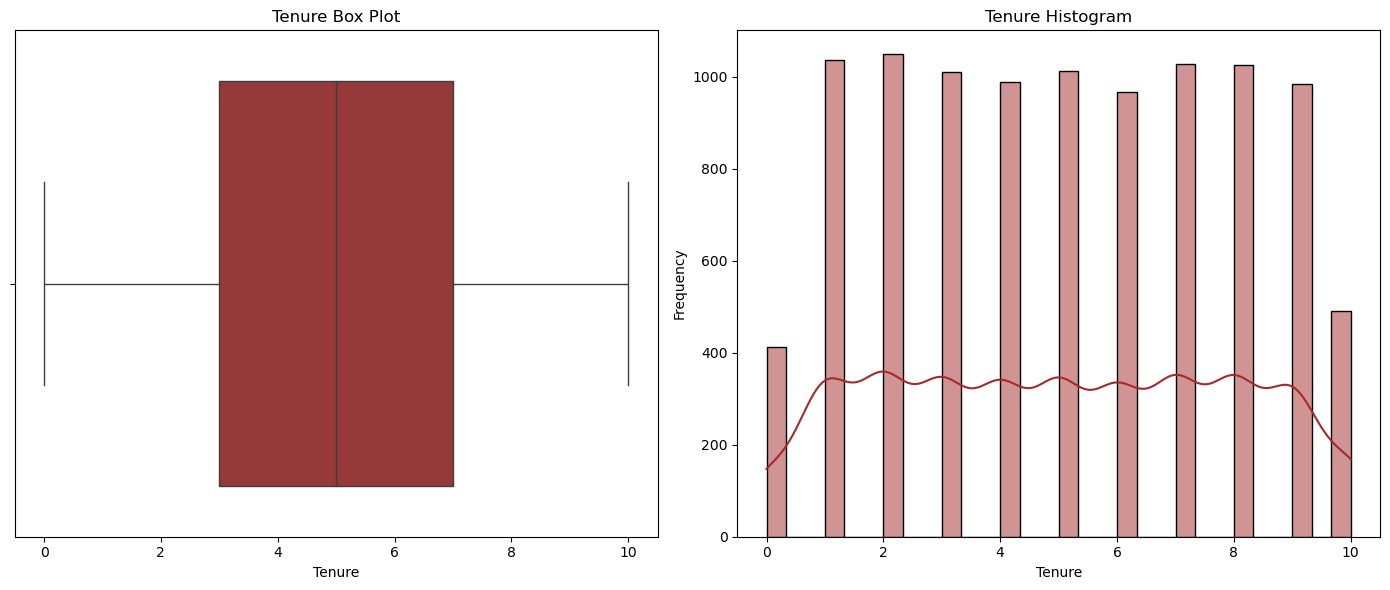

In [16]:
# Tenure is the no. of years the customer has been with the company
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axs[0], x=df['Tenure'], color='brown')
axs[0].set_title('Tenure Box Plot')
axs[0].set_xlabel('Tenure')

sns.histplot(ax=axs[1], data=df, x='Tenure', bins=30, kde=True, color='brown')
axs[1].set_title('Tenure Histogram')
axs[1].set_xlabel('Tenure')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### *Visualizing CreditScore :*

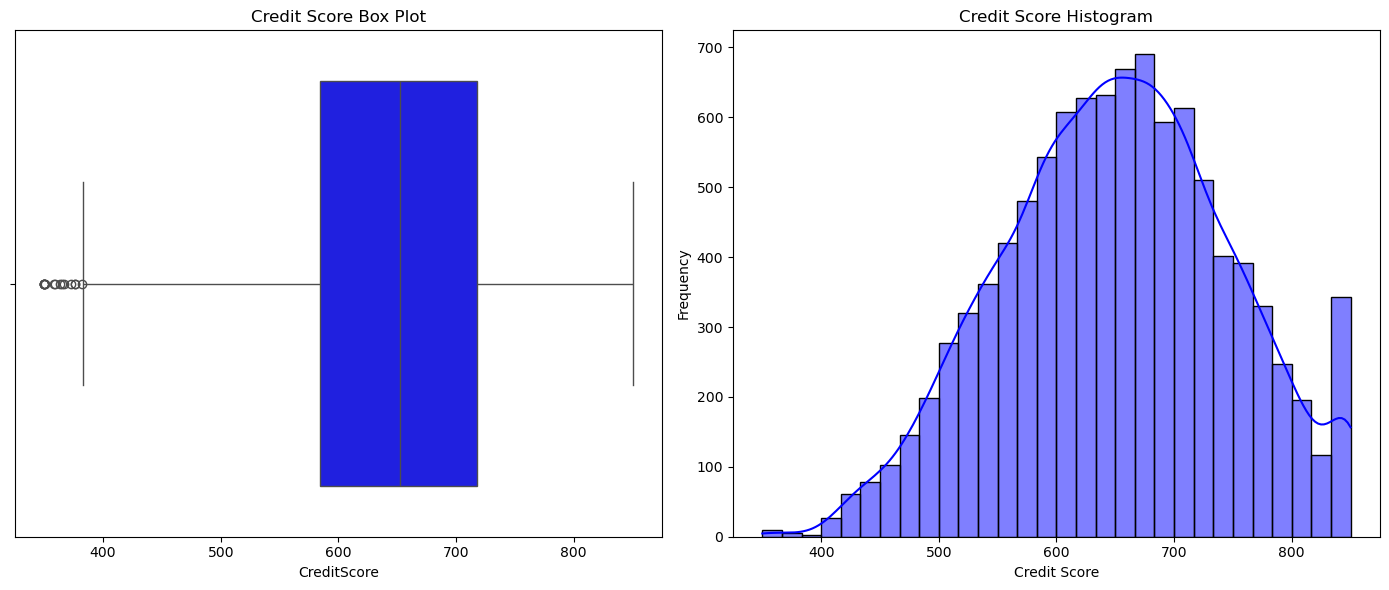

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axs[0], x=df['CreditScore'], color='blue')
axs[0].set_title('Credit Score Box Plot')
axs[0].set_xlabel('CreditScore')

sns.histplot(ax=axs[1], data=df, x='CreditScore', bins=30, kde=True, color='blue')
axs[1].set_title('Credit Score Histogram')
axs[1].set_xlabel('Credit Score')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### *Visualizing Balance :*

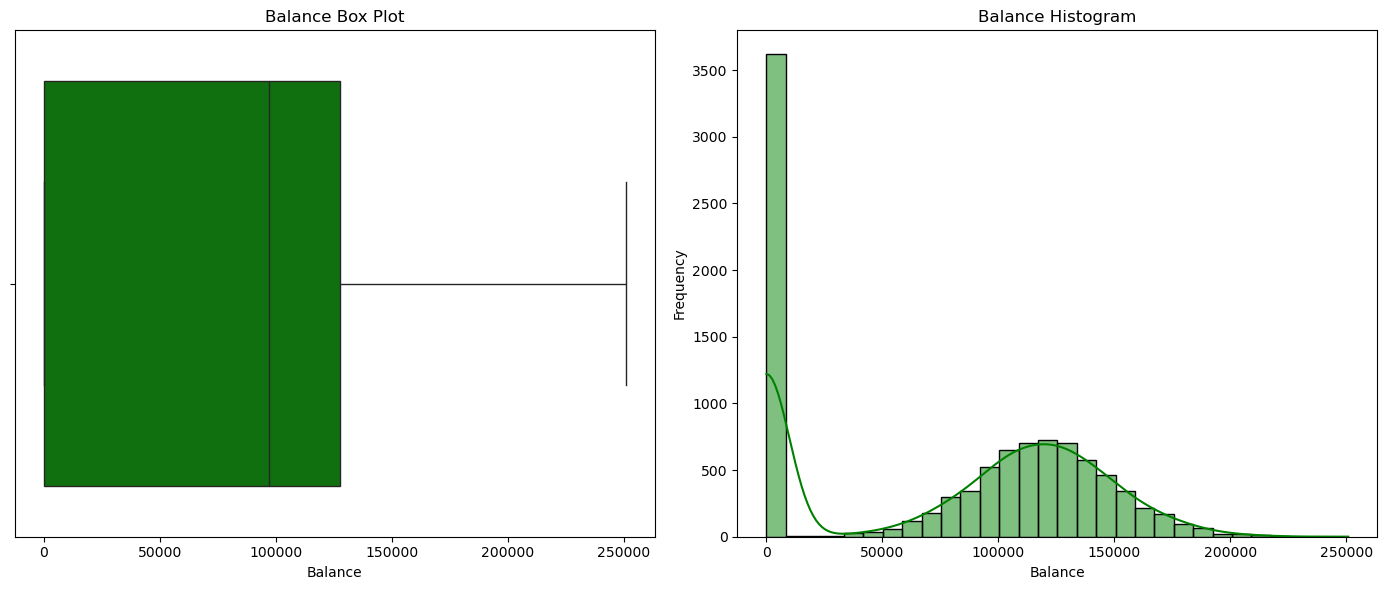

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axs[0], x=df['Balance'], color='green')
axs[0].set_title('Balance Box Plot')
axs[0].set_xlabel('Balance')

sns.histplot(ax=axs[1], data=df, x='Balance', bins=30, kde=True, color='green')
axs[1].set_title('Balance Histogram')
axs[1].set_xlabel('Balance')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### *Visualizing Number Of Products :*

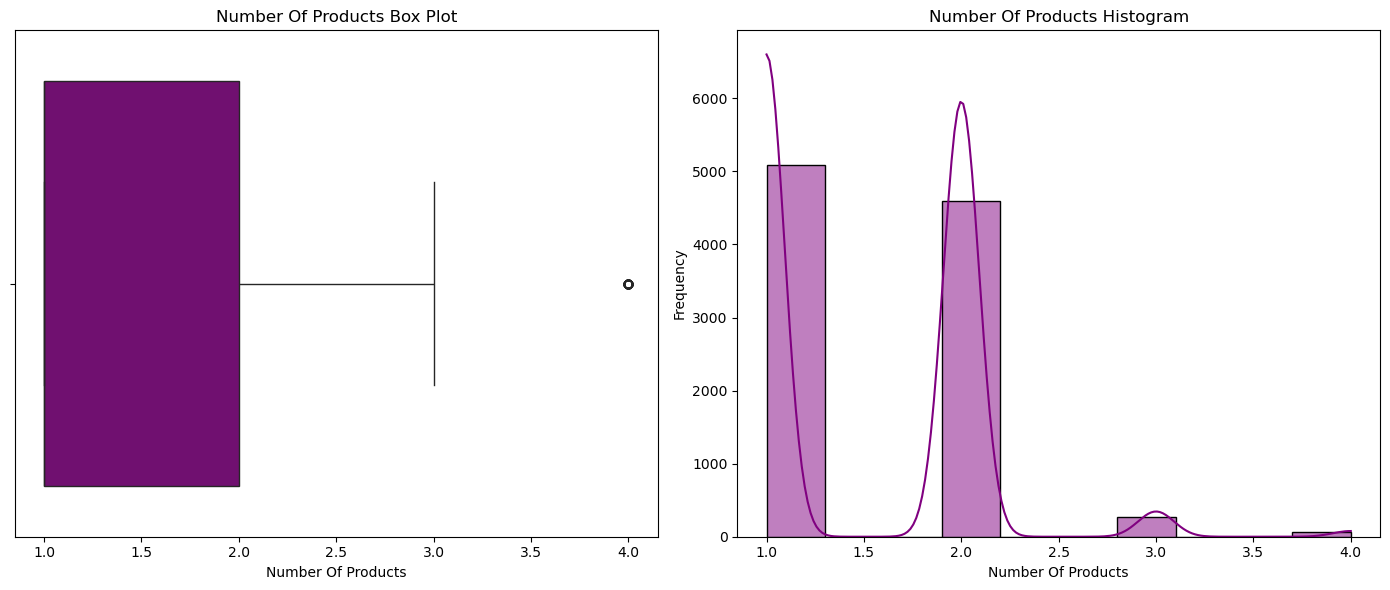

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axs[0], x=df['NumOfProducts'], color='purple')
axs[0].set_title('Number Of Products Box Plot')
axs[0].set_xlabel('Number Of Products')

sns.histplot(ax=axs[1], data=df, x='NumOfProducts', bins=10, kde=True, color='purple')
axs[1].set_title('Number Of Products Histogram')
axs[1].set_xlabel('Number Of Products')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### *Visualizing Estimated Salary :*

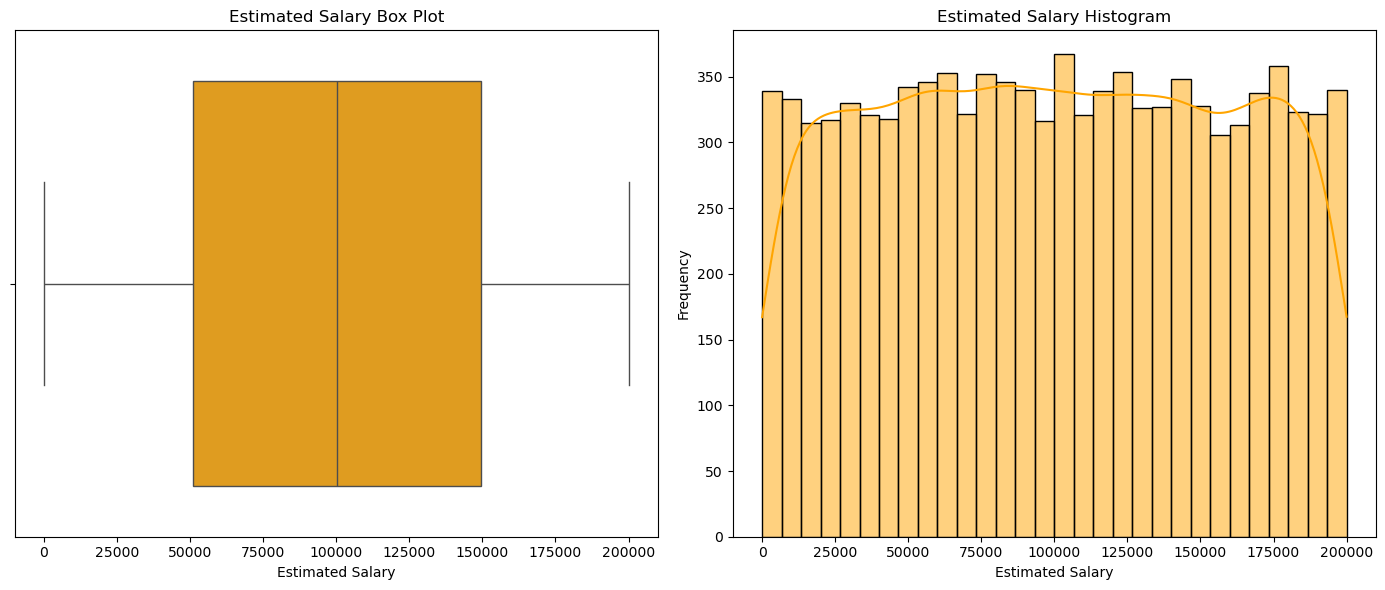

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axs[0], x=df['EstimatedSalary'], color='orange')
axs[0].set_title('Estimated Salary Box Plot')
axs[0].set_xlabel('Estimated Salary')

sns.histplot(ax=axs[1], data=df, x='EstimatedSalary', bins=30, kde=True, color='orange')
axs[1].set_title('Estimated Salary Histogram')
axs[1].set_xlabel('Estimated Salary')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### *Visualizing Geography :*

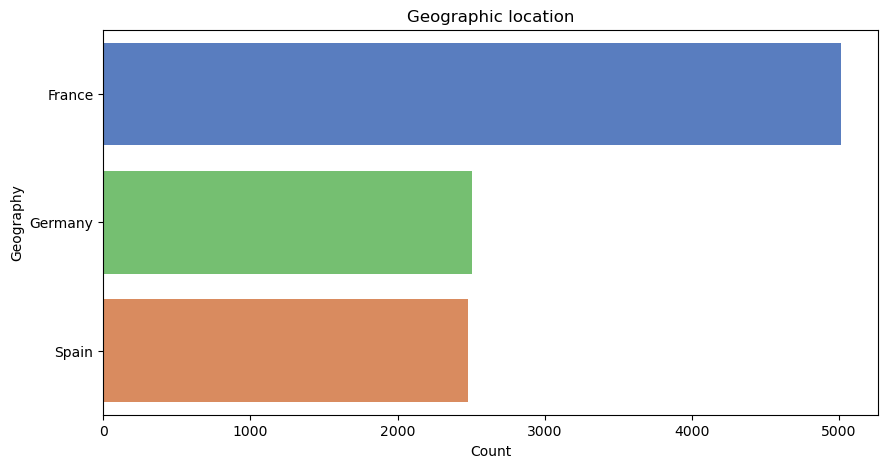

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Geography', hue='Geography', data=df, palette='muted', order=df['Geography'].value_counts().index, legend=False)
plt.title('Geographic location')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.show()

#### *Visualizing Gender :*

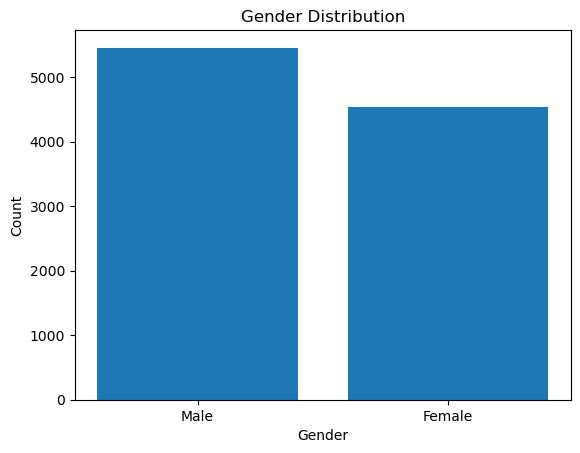

In [28]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

#### *Visualizing HasCrCard :*

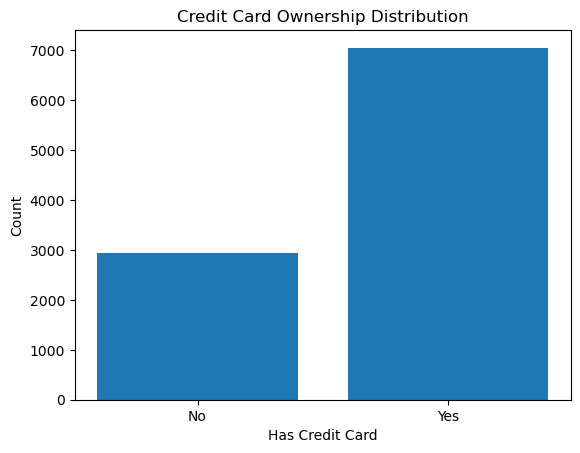

In [30]:
# HasCrCard "Has Credit Card?"
credit_card_counts = df['HasCrCard'].value_counts()
plt.bar(credit_card_counts.index, credit_card_counts.values)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Credit Card Ownership Distribution')
plt.show()

#### *Visualizing IsActiveMember :*

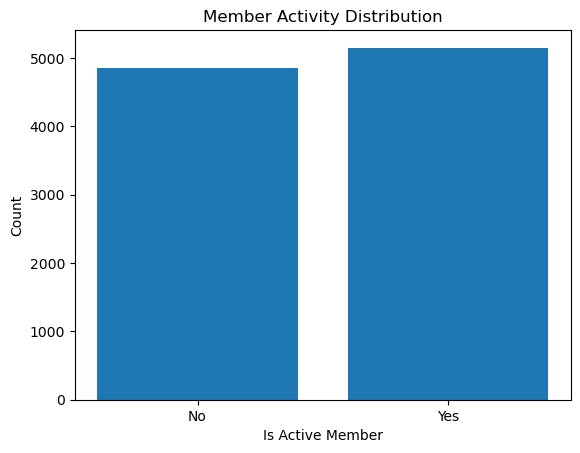

In [32]:
IsActive_counts = df['IsActiveMember'].value_counts()
plt.bar(IsActive_counts.index, IsActive_counts.values)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Member Activity Distribution')
plt.show()

#### *Visualizing the Target :*

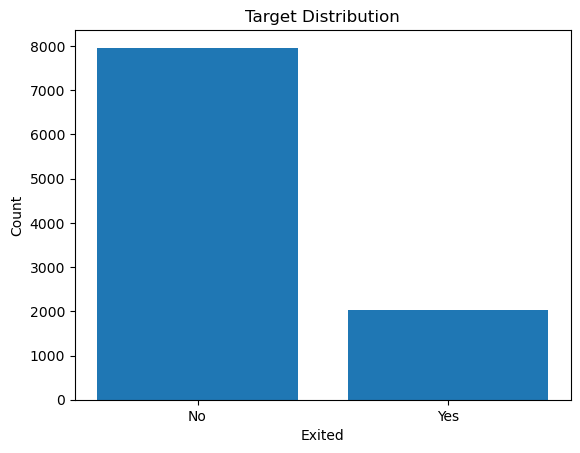

In [34]:
# Visualizing the Target
counts = df['Exited'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

#### *Correlation Heatmap :*

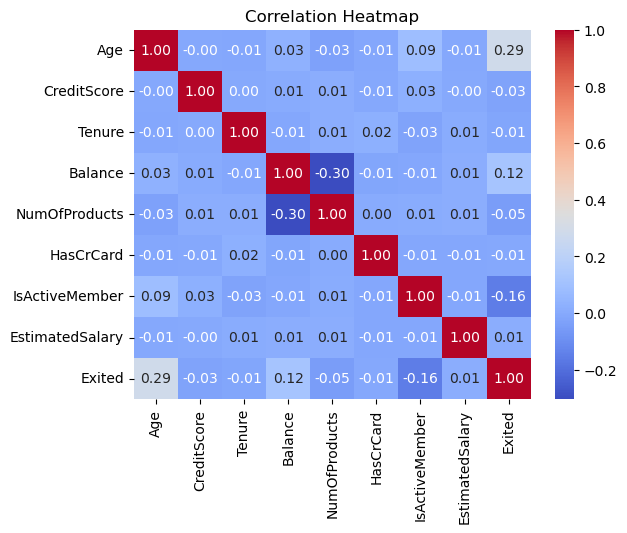

In [36]:
correlation_matrix = df[['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Observations on the Heatmap:
# Age has the strongest correlation with churn (0.29) which means that older customers are more likely to churn.
# Balance and IsActiveMember have weak correlations with churn.
# Features like CreditScore, Tenure, HasCrCard, NumOfProducts and EstimatedSalary have almost no correlation with churn.

## ***3. Feature Engineering:***

In [39]:
# Applying One-Hot Encoding for categorical variables 'Gender' and 'Geography'
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [40]:
# New generated columns info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [41]:
# Converting the new columns from 'bool' to 'int'
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


## ***4. Splitting the Dataset:***

In [44]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Training set statistics
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.251375,0.249375,0.545250
std,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.433831,0.432678,0.497979
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000
25%,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000,0.000000,0.000000
50%,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000,0.000000,1.000000
75%,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000


## ***5. Oversampling:***

In [47]:
# Training set before Oversampling
print(y_train.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64


In [48]:
# Applying SMOTE (Synthetic Minority Oversampling Technique) to balance the classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [49]:
# Training set after Oversampling
print(y_train.value_counts())

Exited
0    6356
1    6356
Name: count, dtype: int64


## ***6. Feature Standardization:***

In [51]:
scaler = StandardScaler()

# Fitting the Scalar on training set
X_train = scaler.fit_transform(X_train)

# Transforming the testing set
X_test = scaler.transform(X_test)

In [52]:
# X_train and X_test are no longer dataframes, they became numpy arrays.  

# Features after standardization
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
print("Mean:\n", mean)
print("\nStandard Deviation:", std)

Mean:
 [-3.06306969e-16 -1.43092307e-16 -3.57730767e-17 -1.78865383e-16
 -1.25205768e-16 -1.07319230e-16 -7.15461534e-17 -7.71356966e-17
  5.81312496e-17  1.78865383e-17  0.00000000e+00]

Standard Deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [53]:
# Comment: Features now have approx. zero mean and a standard deviation of 1

## ***7. Model Evaluation:***

In [55]:
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(), 
    'SVM': SVC(probability=True),  # Enable probability estimation for ROC visualization
    'Decision Tree': DecisionTreeClassifier()
}

results = {} # Nested dictionary containing the scores of each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
   
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {results[name]['Accuracy']:.2f}")
    print(f"Precision: {results[name]['Precision']:.2f}")
    print(f"Recall: {results[name]['Recall']:.2f}")
    print(f"F1-Score: {results[name]['F1-Score']:.2f}")
    print(f"ROC-AUC: {results[name]['ROC-AUC']:.2f}")   


KNN Metrics:
Accuracy: 0.76
Precision: 0.42
Recall: 0.59
F1-Score: 0.49
ROC-AUC: 0.77

Naive Bayes Metrics:
Accuracy: 0.73
Precision: 0.39
Recall: 0.60
F1-Score: 0.47
ROC-AUC: 0.74

SVM Metrics:
Accuracy: 0.80
Precision: 0.49
Recall: 0.66
F1-Score: 0.56
ROC-AUC: 0.83

Decision Tree Metrics:
Accuracy: 0.75
Precision: 0.41
Recall: 0.62
F1-Score: 0.49
ROC-AUC: 0.70


## ***8. Comparing Algorithms:***

In [57]:
# Converting "results" dictionary into a DataFrame
results_df = pd.DataFrame(results)
results_df

,KNN,Naive Bayes,SVM,Decision Tree
Accuracy,0.759500,0.735000,0.800000,0.749000
Precision,0.420290,0.386777,0.493333,0.409015
Recall,0.590331,0.595420,0.659033,0.623410
F1-Score,0.491005,0.468938,0.564270,0.493952
ROC-AUC,0.768111,0.742035,0.831839,0.701562


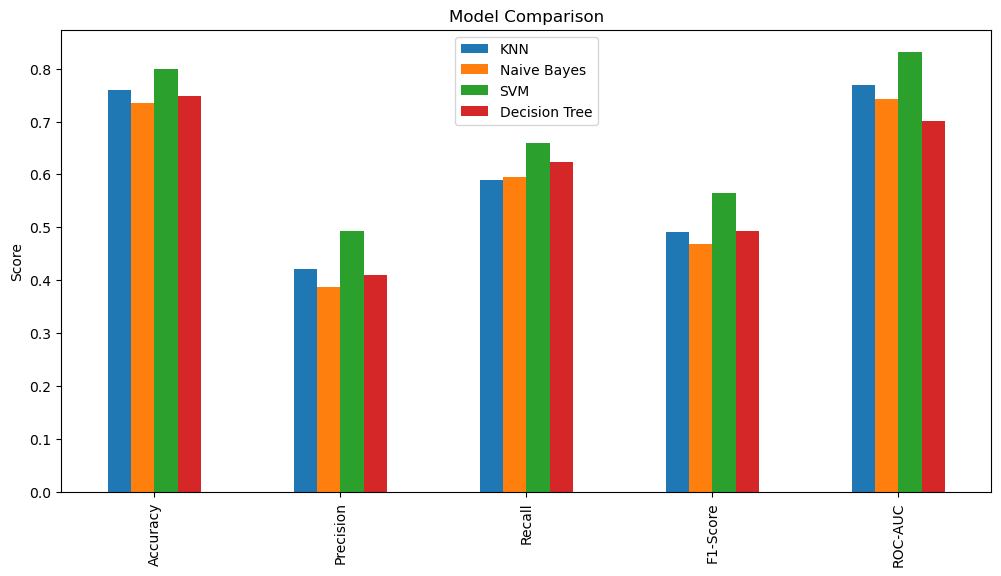

In [58]:
# Visualizing results
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()

#### *Visualizing ROC curves:*

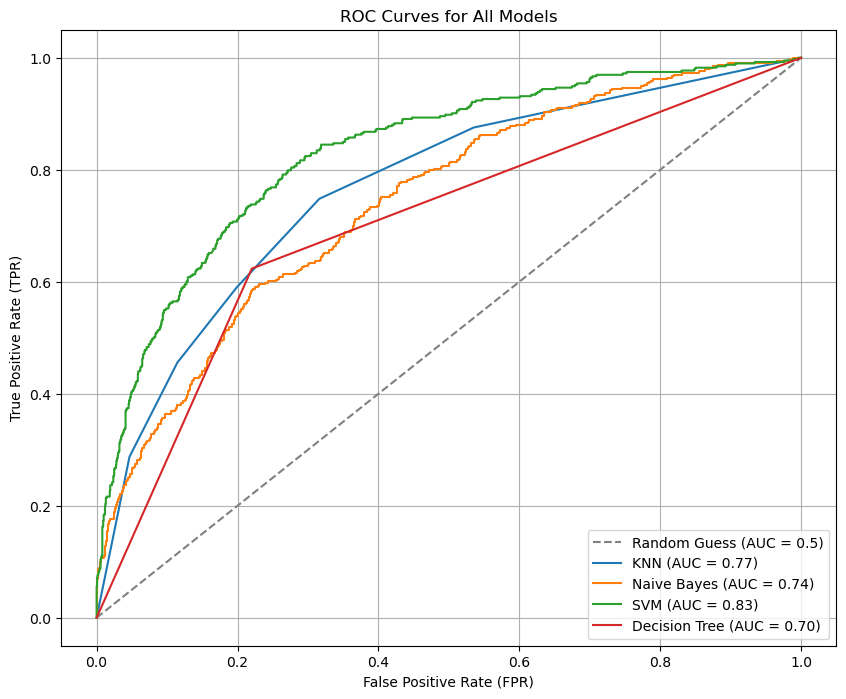

In [60]:
plt.figure(figsize=(10, 8))

# Plotting the random guess line (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.5)')

# Plotting ROC curves for each model
for name, model in models.items():    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [61]:
# Comment: SVM is the best model. It consistently outperforms the other models in accuracy, precision, recall, F1-score, and ROC-AUC.

#### *The Best Model:*

In [63]:
Churn_Detector = models['SVM']